<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/3_XGBoost_new_class_weight_high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --quiet fastai==2.2.5

In [3]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf

#  Dataset import

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data = mf.new_processing(data)
data = pd.get_dummies(data)

In [5]:
cols = mf.get_col(data)

In [6]:
load = False
save_id = True 

if load:
  X_train, y_train = mf.get_set('train_id', data, 'xgboost_numpy', labels = True)
  X_val, y_val = mf.get_set('val_id', data, 'xgboost_numpy', labels = True)
  X_test, y_test = mf.get_set('test_id', data, 'xgboost_numpy', labels = True)

Splitto il dataset in train, validation e test set. 

In [7]:
def overSampling(X, y, frac_over=0.1):
  from imblearn.over_sampling import SMOTE
  sm = SMOTE(sampling_strategy=frac_over, random_state=42)
  X_sm, y_sm = sm.fit_resample(X, y)  
  return X_sm, y_sm

In [8]:
if not load:
  X_train, X_test, y_train, y_test = mf.split(data, test_size = 0.2)
  # X_train, y_train = overSampling(X_train, y_train)
  del data
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

`save_list(filename, list)`: permette di salvare in un file .txt gli id dei dati su cui il modello verrà allenato e validato. 

In [9]:
if save_id:
  train_id = X_train.index.tolist()
  val_id = X_val.index.tolist()
  test_id = X_test.index.tolist()
  mf.save_list('train_id',train_id)
  mf.save_list('val_id', val_id)
  mf.save_list('test_id', test_id)

# load_id = False 
# if load_id:
#   mf.load_list('train_id',train_id)
#   mf.load_list('val_id', val_id)
#   mf.load_list('test_id', test_id)

# XGBoost

ROC curve: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py

XGBoost: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

gpu_hist method: https://xgboost.readthedocs.io/en/latest/parameter.html#additional-parameters-for-hist-and-gpu-hist-tree-method

## Load model

Tramite la libreria `joblib` viene caricato il modello già allenato. 

Riferimento: https://xgboost.readthedocs.io/en/latest/python/python_intro.html

In [10]:
if load:
  from joblib import load
  from xgboost import XGBClassifier

  clf = load("/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/xgboost_numpy/xgb_np.joblib.dat")

## Training

Fase di training e tuning dei parametri del modello. 

Notare che i set devono essere trasformati da dataframe a array numpy, poichè sarà necessario per la fase di XAI.

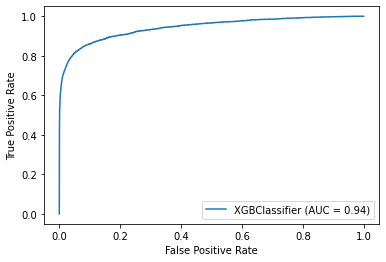

In [40]:
from sklearn.metrics import plot_roc_curve
import xgboost as xgb
from xgboost import XGBClassifier

if not load:
  clf = XGBClassifier(n_estimators = 4000, 
                      max_depth = 10, 
                      objective='binary:logistic', 
                      learning_rate = 0.8, 
                      tree_method='gpu_hist',
                      eta = 0.1,
                      subsample = 0.5,
                      #lambda = 0.5,
                      scale_pos_weight = 8
                      ) #, sample_weight = [1,30] ) 
  
  clf.fit(X_train, y_train)

plot_roc_curve(clf, X_val, y_val)
plt.show()

# Save model

Tramite `joblib` salvo il modello appena allenato. 

In [41]:
save = True
if save:
  from joblib import dump
  dump(clf, "xgb_np.joblib.dat")

# Perfomance evaluation

## Confusion matrix

In [42]:
booster = clf.get_booster()

In [43]:
booster.feature_names

['TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 

[[113254    599]
 [  1497   2757]]


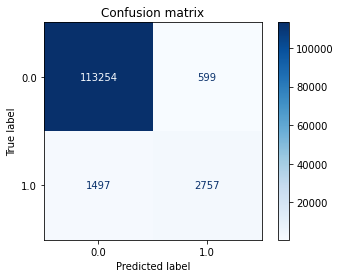

In [44]:
mf.conf_matrix(clf, X_test, y_test)

## Mean average precision

AP max = 0.84

AP: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

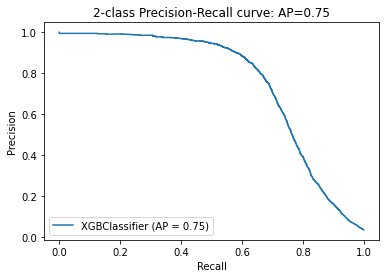

In [45]:
mf.ap_metric(clf, X_test, y_test, proba = True)

In [46]:
mf.f1(clf, X_test, y_test)

0.7245729303547964

Soglia:  0.5
F1 score:  0.72
Recall:  0.65
Precision:  0.82




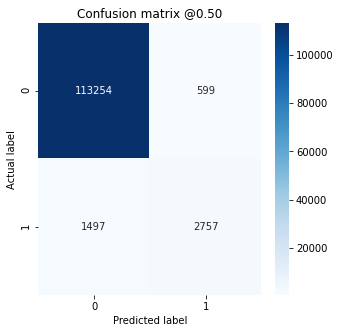



Soglia:  0.2
F1 score:  0.72
Recall:  0.68
Precision:  0.77




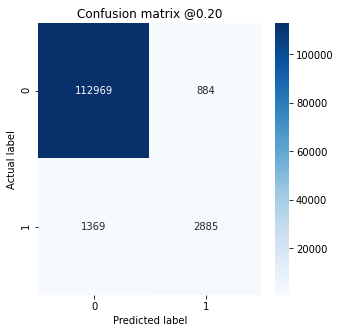



Soglia:  0.1
F1 score:  0.71
Recall:  0.7
Precision:  0.72




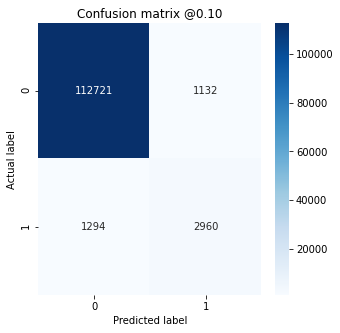



Soglia:  0.05
F1 score:  0.69
Recall:  0.71
Precision:  0.68




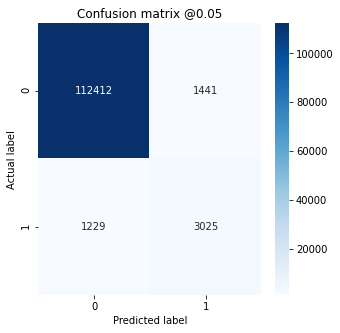



Soglia:  0.02
F1 score:  0.67
Recall:  0.73
Precision:  0.62




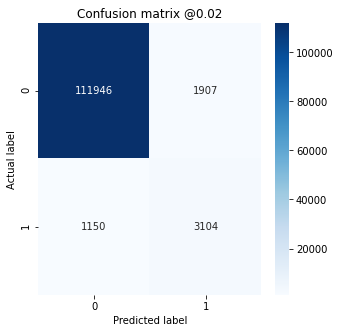



Soglia:  0.01
F1 score:  0.65
Recall:  0.74
Precision:  0.58




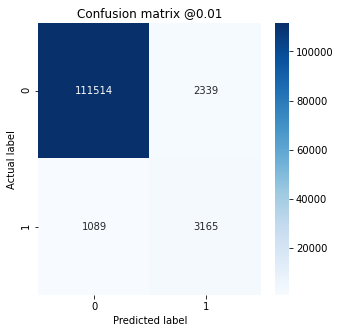



Soglia:  0.005
F1 score:  0.62
Recall:  0.76
Precision:  0.53




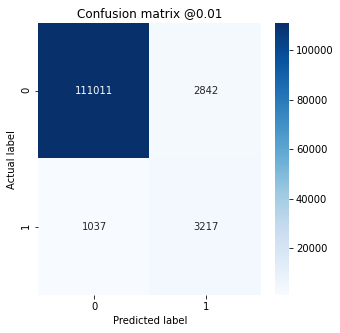



Soglia:  0.002
F1 score:  0.59
Recall:  0.77
Precision:  0.47




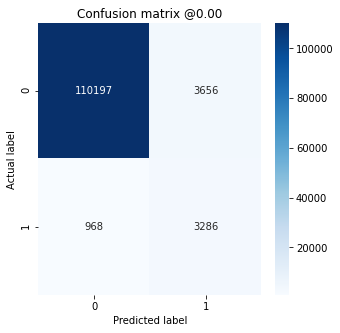

In [47]:
soglie = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]
proba = clf.predict_proba(X_test)
cmap = 'Blues'
precision, recall, f1 = mf.tresh(soglie, proba, y_test, cmap)

## Feature importance

Cambio il nome delle feature assegnato di default da xgboost quando viene trainato su un array numpy. 

Riferimento: https://stackoverflow.com/questions/54933804/how-to-get-actual-feature-names-in-xgboost-feature-importance-plot-without-retra

In [48]:
# clf.get_booster().feature_names = cols

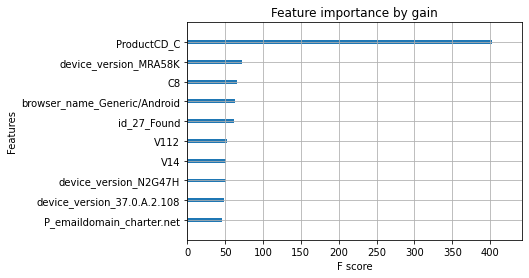

In [49]:
xgb.plot_importance(clf, max_num_features = 10, importance_type='gain', show_values=False, title='Feature importance by gain')

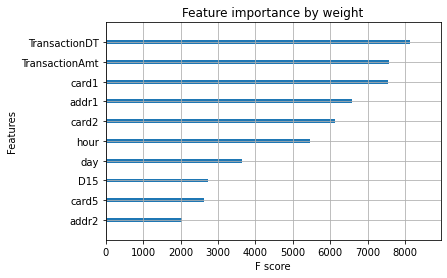

In [50]:
xgb.plot_importance(clf, max_num_features = 10, importance_type='weight', show_values=False, title='Feature importance by weight')

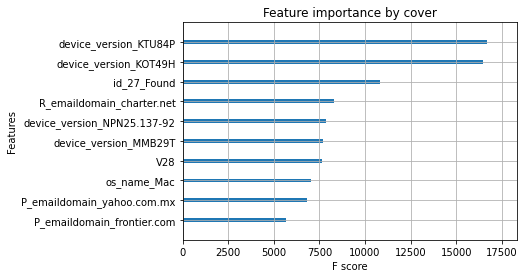

In [51]:
xgb.plot_importance(clf, max_num_features = 10, importance_type='cover', show_values=False, title='Feature importance by cover')

`ratio_dictionary(clf, data, n_features)`: permette di selezionare le n_features più importanti e controllare il ratio di eventi fraudolenti che tali features individuano. 